In [15]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 27 21:53:34 2015

@author: nymph
"""


#################################### Read the data ############################
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
''' read_csv()
The read_csv() function in pandas package parse an csv data as a DataFrame data structure. What's the endpoint of the data?
The data structure is able to deal with complex table data whose attributes are of all data types. 
Row names, column names in the dataframe can be used to index data.
'''

data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original", delim_whitespace = True, \
 header=None, names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin', 'car_name'])

data['mpg']
data.mpg
data.iloc[0,:]

print(data.shape)

################################## Enter your code below ######################


(406, 9)


In [2]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


1. How many cars and how many attributes are in the data set.

In [3]:
print('Number of cars:', data.shape[0])
print('Number of attributes:', data.shape[1])

Number of cars: 406
Number of attributes: 9


2. How many distinct car companies are represented in the data set? What is the name of the car
with the best MPG? What car company produced the most 8-cylinder cars? What are the names
of 3-cylinder cars? Do some internet search that can tell you about the history and popularity of
those 3-cylinder cars.

In [4]:
car_company = data['car_name'].str.split(' ').apply(lambda x: x[0])
print('Number of distinct car companies:', car_company.nunique())

Number of distinct car companies: 38


In [5]:
print('Name of the car with the best MPG:',data.iloc[data['mpg'].argmax()]['car_name'])

Name of the car with the best MPG: mazda glc


In [6]:
new_data = data.copy()
new_data['car_company'] = new_data['car_name'].str.split(' ').apply(lambda x: x[0])
t = new_data[['car_company', 'cylinders']][new_data['cylinders'] == 8]\
    .groupby(by=['car_company']).agg(['count'])
print('Car company produced the most 8-cylinder cars:', t.iloc[t.values.argmax()].name)

Car company produced the most 8-cylinder cars: ford


In [9]:
print('Names of 3-cylinder cars:')
data['car_name'][data['cylinders'] == 3]

Names of 3-cylinder cars 


78     mazda rx2 coupe
118          maxda rx3
250         mazda rx-4
341      mazda rx-7 gs
Name: car_name, dtype: object

3. What is the range, mean, and standard deviation of each attribute? Pay attention to potential
missing values.

In [10]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [12]:
data.isna().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model           0
origin          0
car_name        0
dtype: int64

In [14]:
new_data = new_data.dropna()

4. Plot histograms for each attribute. Pay attention to the appropriate choice of number of bins.
Write 2-3 sentences summarizing some interesting aspects of the data by looking at the histograms.

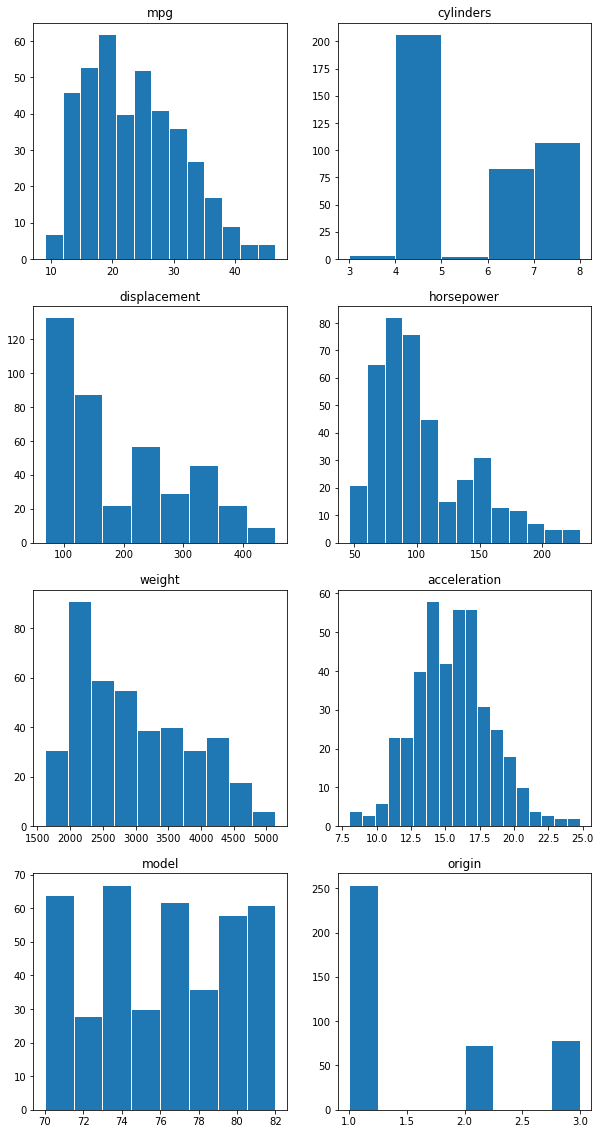

In [25]:
fig, axes = plt.subplots(4, 2, figsize=(10, 20))
cols = data.columns[:-1]
for i in range(4):
    for j in range(2):
        t = data[cols[i*2 + j]]
        # Freedman-Diaconis rule
        q1 = t.quantile(0.25)
        q3 = t.quantile(0.75)
        iqr = q3 - q1
        bin_width = (2 * iqr) / (len(t) ** (1 / 3))
        bin_count = int(np.ceil((t.max() - t.min()) / bin_width))
        axes[i][j].hist(t, bins=bin_count, edgecolor='w')
        axes[i][j].set_title(cols[i*2 + j])

5. Plot a scatterplot of weight vs. MPG attributes. What do you conclude about the relationship
between the attributes? What is the correlation coefficient between the 2 attributes?

Correlation coefficient: -0.8749473981990712


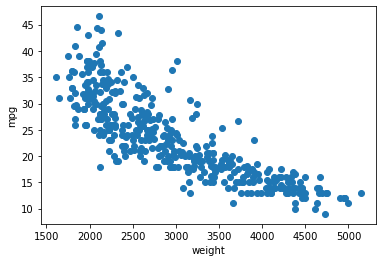

In [33]:
plt.scatter(data['weight'], data['mpg']);
plt.xlabel('weight')
plt.ylabel('mpg')
print('Correlation coefficient:', data[['weight','mpg']].corr(method='spearman').iloc[0, 1])

6. Plot a scatterplot of year vs. cylinders attributes. Add a small random noise to the values to make
the scatterplot look nicer. What can you conclude? Do some internet search about the history of car
industry during 70’s that might explain the results.(Hint: data.mpg + np.random.random(len(data.mpg))
will add small random noise)

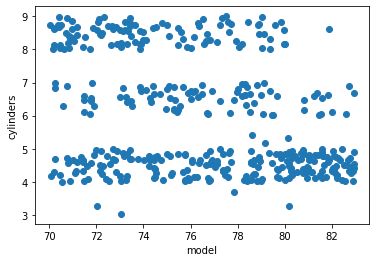

In [46]:
x = data['model'] + np.random.random(len(data['model']))
y = data['cylinders'] + np.random.random(len(data['cylinders']))

plt.scatter(x, y)
plt.xlabel('model')
plt.ylabel('cylinders');

7. Show 2 more scatterplots that are interesting do you. Discuss what you see.

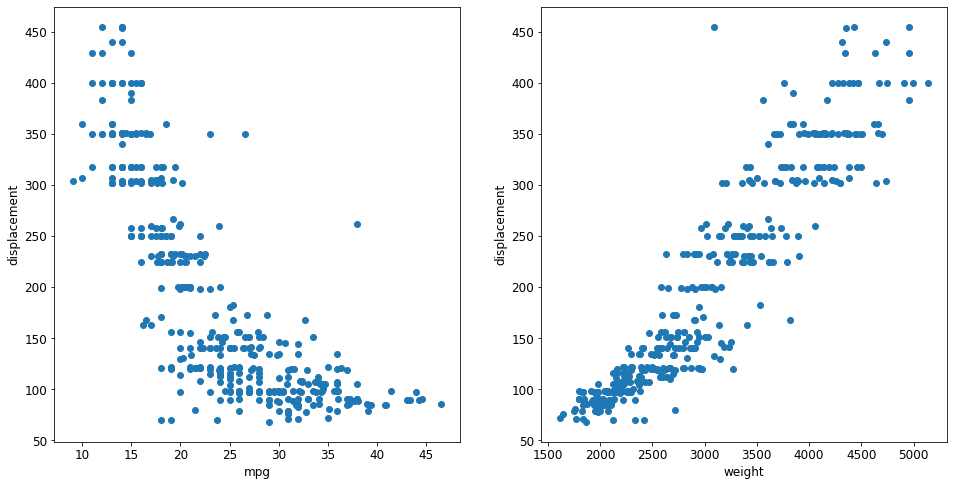

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.scatter(data['mpg'], data['displacement']);
ax1.set_xlabel('mpg', fontsize=12)
ax1.set_ylabel('displacement', fontsize=12);
ax1.tick_params('both', labelsize=12)
ax2.scatter(data['weight'], data['displacement'])
ax2.set_xlabel('weight', fontsize=12)
ax2.set_ylabel('displacement', fontsize=12)
ax2.tick_params('both', labelsize=12)

8. Plot a time series for all the companies that show how many new cars they introduces during
each year. Do you see some interesting trends? (Hint: data.car name.str.split()[0] returns
a vector of the first word of car name column.)

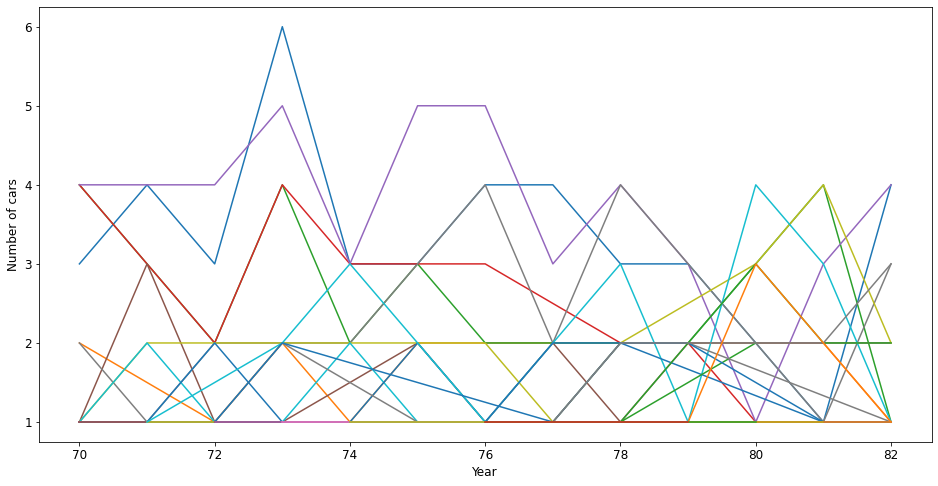

In [75]:
car_company = data['car_name'].str.split(' ').apply(lambda x: x[0]).unique()

fig, ax = plt.subplots(figsize=(16, 8))
for c in car_company:
    t = new_data['model'][new_data['car_company'] == c].value_counts().sort_index()
    ax.plot(t.index, t.values)

ax.set_ylabel('Number of cars', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.tick_params(labelsize=12)


9. Calculate the pairwise correlation, and draw the heatmap with Matplotlib. Do you see some
interesting correlation? (Hint: data.iloc[:,0:8].corr(), plt.pcolor() draws the heatmap.)

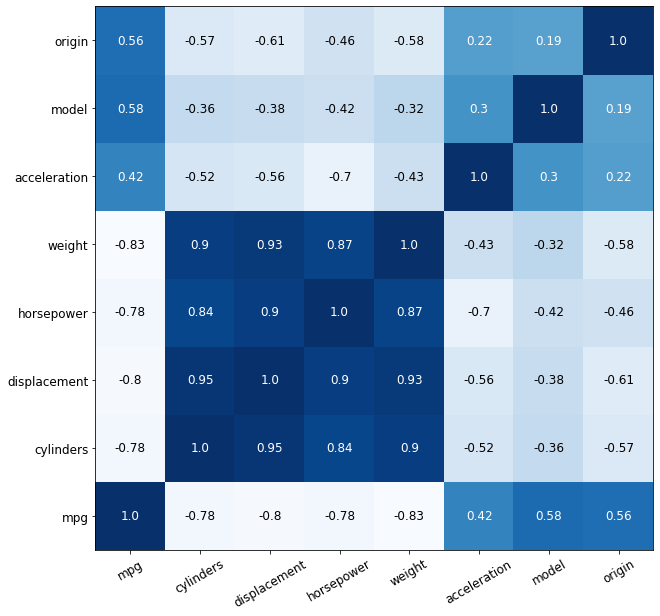

In [83]:
corr = data.iloc[:, :8].corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.pcolor(corr, cmap='Blues')
ax.set_xticks(0.5 + np.arange(corr.shape[0]), corr.columns)
ax.set_yticks(0.5 + np.arange(corr.shape[0]), corr.columns)

for i in range(corr.shape[0]):
    for j in range(corr.shape[0]):
        if np.round(corr.iloc[i, j], 2) < 0:
            c = 'black'
        else: c = 'w'
        ax.text(
            0.5 + i, 0.5 + j, 
            np.round(corr.iloc[i, j], 2), 
            fontsize=12,
            color=c,
            ha='center',
            va='center')
ax.tick_params('both', labelsize=12)
ax.tick_params('x', rotation=30)